In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import _init_paths
from PIL import Image
import matplotlib.pyplot as plt
from ult.config import cfg

import _init_paths
import pickle
import json
import numpy as np
import cv2
import os
import sys

In [19]:
with open( cfg.ROOT_DIR + "/Results/160000_iCAN_ResNet50_HICO.pkl", "rb" ) as gt:
    u_gt = pickle._Unpickler(gt)
    u_gt.encoding = 'latin1'
    Detection = u_gt.load()
# with open( cfg.ROOT_DIR + "/Results/300000_iCAN_ResNet50_VCOCO.pkl", "rb" ) as gt:
#     u_gt = pickle._Unpickler(gt)
#     u_gt.encoding = 'latin1'
#     Detection = u_gt.load()

In [20]:
Detection[1]

[[array([313.09064, 306.0023 , 353.63995, 346.9553 ], dtype=float32),
  array([265.02414, 303.9174 , 312.98654, 348.43442], dtype=float32),
  1,
  array([2.04365008e-07, 5.33552802e-09, 3.33602145e-07, 4.19457891e-08,
         4.41891359e-08, 1.05488319e-07, 1.12131511e-06, 1.80766207e-07,
         1.06613305e-08, 4.11120539e-07, 3.03637719e-08, 1.78114320e-07,
         1.38845095e-07, 1.34035205e-09, 1.88755855e-08, 3.40184556e-08,
         2.16624532e-08, 4.27957865e-08, 2.94490459e-08, 1.17674574e-07,
         3.50310039e-08, 1.99388133e-08, 5.46155787e-09, 4.00120116e-05,
         6.25937702e-08, 1.84980138e-07, 1.83398452e-08, 8.25095103e-09,
         1.64807137e-08, 2.69186273e-07, 1.89681899e-07, 2.19757453e-07,
         3.25785294e-07, 9.84879165e-08, 2.63032064e-07, 7.66560415e-09,
         3.45938645e-07, 7.87640815e-08, 3.29498616e-05, 2.30407895e-05,
         1.60967460e-07, 3.38508071e-05, 5.90383536e-07, 4.32394351e-08,
         1.28192026e-08, 1.58522998e-05, 1.45208672e

In [30]:
a = np.array(Detection[1][0][3])
# print(a)
np.unravel_index(a.argmax(), a.shape)


(169,)

2921


TypeError: 'int' object is not subscriptable

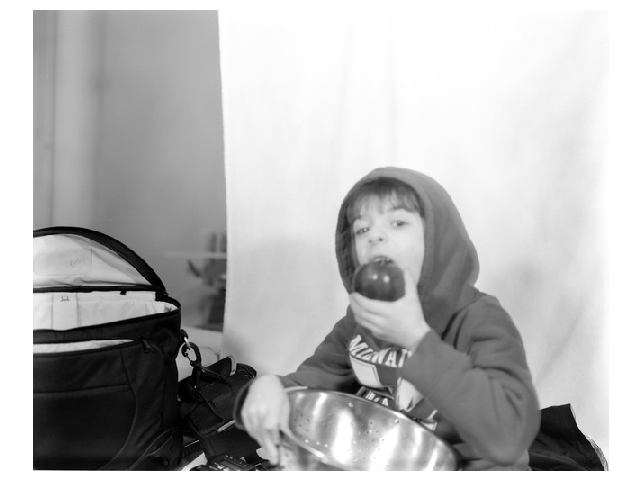

In [15]:
image_id = 2014
# 23359
#565248

cc = plt.get_cmap('hsv', lut=6)
dpi = 80

# im_file = cfg.DATA_DIR + '/v-coco/coco/images/val2014/COCO_val2014_' + (str(image_id)).zfill(12) + '.jpg'
im_file = cfg.DATA_DIR + '/hico_20160224_det/images/test2015/HICO_test2015_'+ (str(image_id)).zfill(8) + '.jpg'
im_data = plt.imread(im_file)
height, width, nbands = im_data.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(im_data, interpolation='nearest')

HO_dic = {}
HO_set = set()
count = 0


for key in Detection.keys():
    ele = Detection[key]
    if (key == image_id):
        action_count = -1
        
        for action_key, action_value in ele.items():
            if (action_key.split('_')[-1] != 'agent') and action_key != 'image_id' and action_key != 'person_box':
                if (not np.isnan(action_value[0])) and (action_value[4] > 0.01):
                    O_box = action_value[:4]
                    H_box = ele['person_box'] 
                    
                    action_count += 1
                    
                    if tuple(O_box) not in HO_set:
                        HO_dic[tuple(O_box)] = count
                        HO_set.add(tuple(O_box))
                        count += 1      
                    if tuple(H_box) not in HO_set:
                        HO_dic[tuple(H_box)] = count
                        HO_set.add(tuple(H_box))
                        count += 1 
                
                    ax.add_patch(
                    plt.Rectangle((H_box[0], H_box[1]),
                                  H_box[2] - H_box[0],
                                  H_box[3] - H_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(H_box)])[:3], linewidth=3)
                    )
                    text = action_key.split('_')[0] + ', ' + "%.2f" % action_value[4]


                    ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
                        text,
                        bbox=dict(facecolor=cc(HO_dic[tuple(O_box)])[:3], alpha=0.5),
                        fontsize=16, color='white')

                    ax.add_patch(
                    plt.Rectangle((O_box[0], O_box[1]),
                                  O_box[2] - O_box[0],
                                  O_box[3] - O_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(O_box)])[:3], linewidth=3)
                    )
                    ax.set(xlim=[0, width], ylim=[height, 0], aspect=1)

In [16]:
for ele in Detection:

    for action_key, action_value in ele.items():
        if (action_key == 'ride_instr') and action_key != 'image_id' and action_key != 'person_box':
            if (not np.isnan(action_value[0])) and (action_value[4] > 0.2):
                print(ele['image_id'])

AttributeError: 'int' object has no attribute 'items'